In [1]:
# Импорт библиотек для работы с данными 
import pandas as pd
import numpy as np

# И отображения графиков
from matplotlib import pyplot as plt

# Импорт моделей машинного обучения, используемых метрик качества обучения и так далее
from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
# Это чтобы при выводе на экран датафреймов, содержащих длинные строки,
# эти строки выводились полностью
pd.set_option("display.max_colwidth", 500)

In [3]:
# Чтение данных по красному вину
data_original = pd.read_csv("./winequality-red.csv", sep=";")

In [4]:
# Смотрим, какие там столбцы и какой порядок значений в начале списка
data_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# И в конце списка
data_original.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


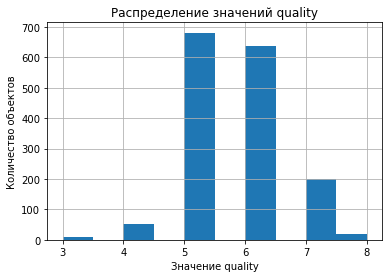

In [6]:
# Посмотрим распределение значений качества вина
data_original["quality"].hist()
plt.xlabel("Значение quality")
plt.ylabel("Количество объектов")
plt.title("Распределение значений quality")
plt.show()

In [7]:
# Тоже смотрим распределение значений качества вина, уже числами
data_original["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# Дисперсия качества вина
data_original["quality"].var()

0.6521683999934209

In [9]:
# Смотрим значение ассиметрии распределения качества вина....
((data_original["quality"] - data_original["quality"].mean()) ** 3).mean()

0.11449470651512093

In [36]:
# И эксцесса распределения
((data_original["quality"] - data_original["quality"].mean()) ** 4).mean()

1.3984278373960632

In [37]:
print("""
Всего у нас около 1600 строк данных - не так много. Сложные модели,
скорее всего, будут переобучаться. Оценка качества вина имеет распределение,
похожее на Гауссово - чаще всего встречаются средние значения 5 и 6.
Значение, большие 5 или меньшие 6 - уже редкость. По сравнению с Гауссовым,
однако, это распределение более островершинное - эксцесс равен 1.4
при дисперсии 0.65

Задачу можно поставить тремя способами.

- Регрессия - предсказать значение качества с метрикой R2
- Многоклассовая классификация - также предсказать точное значение качества, но уже
  как классификацию на 6 классов
- Бинарная классификация - выбор между классами "качество <= 5" и "качество >= 6".
  В первом случае оценка будет почти наверняка 5, во втором - почти наверняка 6.
""")


Всего у нас около 1600 строк данных - не так много. Сложные модели,
скорее всего, будут переобучаться. Оценка качества вина имеет распределение,
похожее на Гауссово - чаще всего встречаются средние значения 5 и 6.
Значение, большие 5 или меньшие 6 - уже редкость. По сравнению с Гауссовым,
однако, это распределение более островершинное - эксцесс равен 1.4
при дисперсии 0.65

Задачу можно поставить тремя способами.

- Регрессия - предсказать значение качества с метрикой R2
- Многоклассовая классификация - также предсказать точное значение качества, но уже
  как классификацию на 6 классов
- Бинарная классификация - выбор между классами "качество <= 5" и "качество >= 6".
  В первом случае оценка будет почти наверняка 5, во втором - почти наверняка 6.



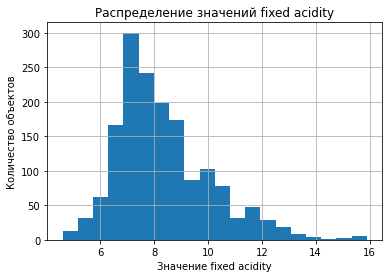

In [38]:
# Смотрим визуально распределение признаков вида, начиная с fixed acidity
data_original["fixed acidity"].hist(bins=20)
plt.xlabel("Значение fixed acidity")
plt.ylabel("Количество объектов")
plt.title("Распределение значений fixed acidity")
plt.show()

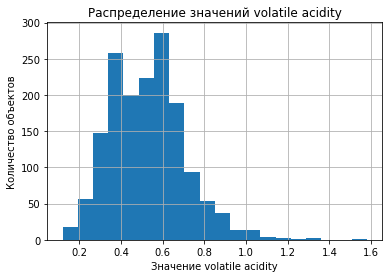

In [39]:
data_original["volatile acidity"].hist(bins=20)
plt.xlabel("Значение volatile acidity")
plt.ylabel("Количество объектов")
plt.title("Распределение значений volatile acidity")
plt.show()

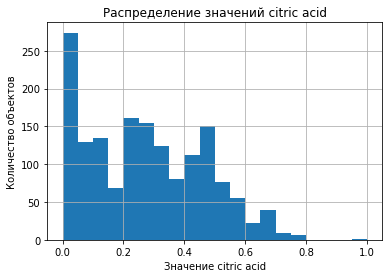

In [40]:
data_original["citric acid"].hist(bins=20)
plt.xlabel("Значение citric acid")
plt.ylabel("Количество объектов")
plt.title("Распределение значений citric acid")
plt.show()

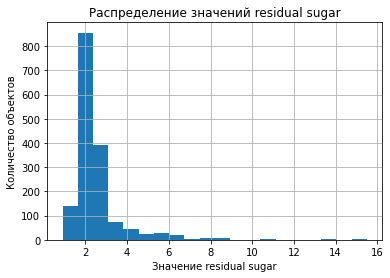

In [41]:
data_original["residual sugar"].hist(bins=20)
plt.xlabel("Значение residual sugar")
plt.ylabel("Количество объектов")
plt.title("Распределение значений residual sugar")
plt.show()

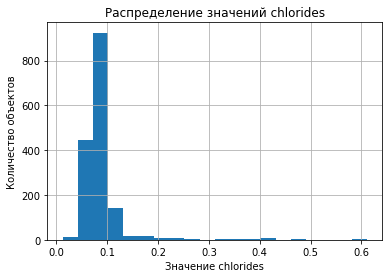

In [42]:
data_original["chlorides"].hist(bins=20)
plt.xlabel("Значение chlorides")
plt.ylabel("Количество объектов")
plt.title("Распределение значений chlorides")
plt.show()

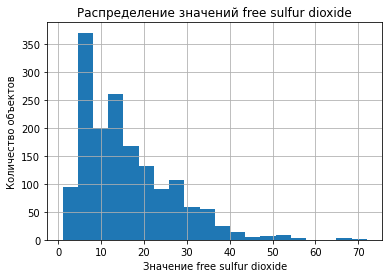

In [43]:
data_original["free sulfur dioxide"].hist(bins=20)
plt.xlabel("Значение free sulfur dioxide")
plt.ylabel("Количество объектов")
plt.title("Распределение значений free sulfur dioxide")
plt.show()

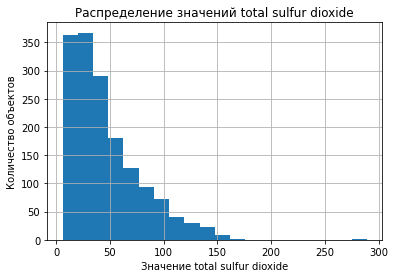

In [44]:
data_original["total sulfur dioxide"].hist(bins=20)
plt.xlabel("Значение total sulfur dioxide")
plt.ylabel("Количество объектов")
plt.title("Распределение значений total sulfur dioxide")
plt.show()

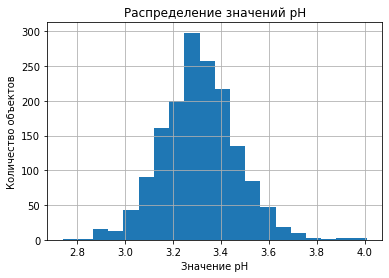

In [45]:
data_original["pH"].hist(bins=20)
plt.xlabel("Значение pH")
plt.ylabel("Количество объектов")
plt.title("Распределение значений pH")
plt.show()

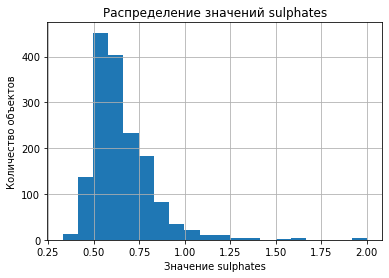

In [46]:
data_original["sulphates"].hist(bins=20)
plt.xlabel("Значение sulphates")
plt.ylabel("Количество объектов")
plt.title("Распределение значений sulphates")
plt.show()

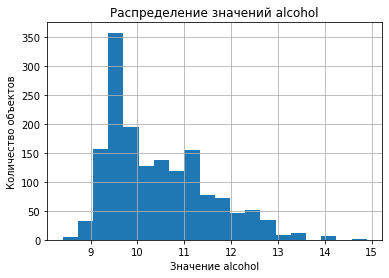

In [47]:
data_original["alcohol"].hist(bins=20)
plt.xlabel("Значение alcohol")
plt.ylabel("Количество объектов")
plt.title("Распределение значений alcohol")
plt.show()

In [48]:
print("""
Все признаки распределены непрерывно. Но если одни имеют вершину в районе центре распределения,
как и целевая переменная то другие - вершину ближе к левому краю. Возможно, качество линейных
моделей можно будет улучшить, применив к этим распределениям логарифмическое преобразование
""")


Все признаки распределены непрерывно. Но если одни имеют вершину в районе центре распределения,
как и целевая переменная то другие - вершину ближе к левому краю. Возможно, качество линейных
моделей можно будет улучшить, применив к этим распределениям логарифмическое преобразование



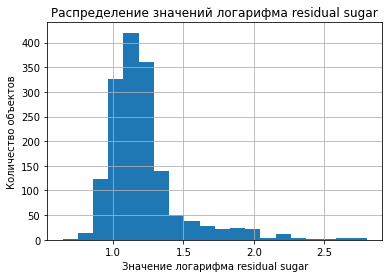

In [49]:
# Смотрим теперь распределение логарифмов некоторых из признаков
np.log1p(data_original["residual sugar"]).hist(bins=20)
plt.xlabel("Значение логарифма residual sugar")
plt.ylabel("Количество объектов")
plt.title("Распределение значений логарифма residual sugar")
plt.show()

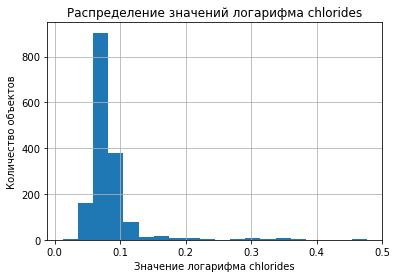

In [50]:
np.log1p(data_original["chlorides"]).hist(bins=20)
plt.xlabel("Значение логарифма chlorides")
plt.ylabel("Количество объектов")
plt.title("Распределение значений логарифма chlorides")
plt.show()

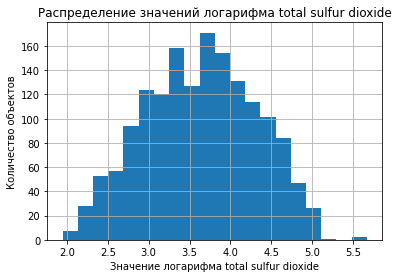

In [51]:
np.log1p(data_original["total sulfur dioxide"]).hist(bins=20)
plt.xlabel("Значение логарифма total sulfur dioxide")
plt.ylabel("Количество объектов")
plt.title("Распределение значений логарифма total sulfur dioxide")
plt.show()

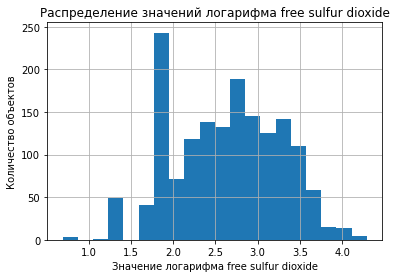

In [52]:
np.log1p(data_original["free sulfur dioxide"]).hist(bins=20)
plt.xlabel("Значение логарифма free sulfur dioxide")
plt.ylabel("Количество объектов")
plt.title("Распределение значений логарифма free sulfur dioxide")
plt.show()

In [53]:
# Эти функции создают заготовки таблиц для сравнительного анализа
# качества моделей классификации и регрессии

def createRegressionScoreboard():
    """
    Создает пустую таблицу, индексированную разновидностями моделей
    регрессии и имеющую 3 столбца. Один из которых будет хранить
    строку с гиперпараметрами найденной лучшей модели этого класса,
    второй - значение коэффициента детерминации лучшей модели на
    обучающих данных, а третий - значение коэффициента детерминации
    для тесровых данных
    """
    return pd.DataFrame(
    {
        "best_model": "",
        "train_score": np.NaN,
        "test_score": np.NaN
    },
    index=[
        "Линейная регрессия",
        "Линейная регрессия с масштабированием",
        "Метод опорных векторов",
        "Метод опорных векторов с масштабированием",
        "Метод ближайших соседей",
        "Метод ближайших соседей с масштабированием",
        "Случайный лес",
        "Случайный лес с преобразованием главных компонент",
        "Градиентный бустинг"
    ]
)

def createClassificationScoreboard():
    """
    Создает пустую таблицу, индексированную разновидностями моделей
    классификации и имеющую 3 столбца. Один из которых будет хранить
    строку с гиперпараметрами найденной лучшей модели этого класса,
    второй - значение верности лучшей модели на обучающих данных, а
    третий - значение верности для тесровых данных
    """
    return pd.DataFrame(
    {
        "best_model": "",
        "train_score": np.NaN,
        "test_score": np.NaN
    },
    index=[
        "Линейная классификация",
        "Линейная классификация с масштабированием",
        "Метод опорных векторов",
        "Метод опорных векторов с масштабированием",
        "Метод ближайших соседей",
        "Метод ближайших соседей с масштабированием",
        "Случайный лес",
        "Случайный лес с преобразованием главных компонент",
        "Градиентный бустинг"
    ]
)

In [54]:
# Создаем таблицы для хранения результатов обучения. Первая таблица -
# для хранения результатов обучения моделей регрессии. Она будет индексирована
# названиями моделей, в столбцах - строка с найденными гиперпараметрами
# наилучшей модели, качество модели (коэффициент детерминации) на
# обучающих данных и качество на тестовых данных.
REGRESSION_SCOREBOARD = createRegressionScoreboard()

# Еще одна таблица для хранения результатов обучения, применяемая для
# матрицы признаков, в которой некоторый из исходных признаков заменены
# их логарифмами. Формат матрицы такой же, как и для первой матрицы.
LOG1P_REGRESSION_SCOREBOARD = createRegressionScoreboard()

# Еще одна таблица результатов, аналогичная первым двум. Она хранит
# данные о качестве моделей для многоклассовой классификации.
# Качеством модели является ее верность (accuracy)
CLASSIFICATION6_SCOREBOARD = createClassificationScoreboard()

# Еще одна таблица результатов, аналогичная первым двум. Она хранит
# данные о качестве моделей для классификации на 3 класса
CLASSIFICATION2_SCOREBOARD = createClassificationScoreboard()


In [55]:
# Функция, обучающие ряд моделей регресии и заносящая
# данные об их качестве в общую таблицу для удобного
# анализа

def fitRegressors(X_train, X_test, y_train, y_test, scoreboard):
    """
    Обучает различные модели регрессии на матрице признаков X_train
    со столбцом значений целевой переменной y_train, затем оценивает
    качество всех моделей на матрице признаков X_test со столбцом
    целевой переменной y_test. Заносит результаты в матрицу scoreboard,
    имеющую столбцы best_model, train_score и test_score - см. описание
    таблицы REGRESSION_SCOREBOARD.
    
    Все модели обучаются с выбором оптимальных гиперпараметров с помощью
    кросс-валидации. Заметим, что для модели линейной регрессии
    используется класс RidgeCV, имеющий встроенный перебор гиперпараметра
    регуляризации, поэтому в явном виде перебор гиперпараметров для
    него не делается.
    """
    # Пробуем линейную регрессию с регуляризацией. Подбор наилучшего гиперпараметра регуляризации
    # уже встроен в эту модель, так что в явном виде перебора не делаем
    reg = RidgeCV()
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Линейная (гребневая) регрессия")
    print("------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Линейная регрессия", "best_model"] = str(reg).replace("\n", " ")
    scoreboard.loc["Линейная регрессия", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Линейная регрессия", "test_score"] = reg.score(X_test, y_test)
    # Пробуем снова линейную модель, но предварительно приведя все признаки к единому масштабу
    reg = Pipeline(
        [
            ('pre', StandardScaler()),
            ('reg', RidgeCV())
        ]
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Линейная (гребневая) регрессия с масштабированием признаков")
    print("-----------------------------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Линейная регрессия с масштабированием", "best_model"] = str(reg).replace("\n", " ")
    scoreboard.loc["Линейная регрессия с масштабированием", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Линейная регрессия с масштабированием", "test_score"] = reg.score(X_test, y_test)
    # Пробуем метод опорных векторов, с перебором гиперпараметров и кросс-валидацией для
    # отбора лучших гиперпараметров
    reg = GridSearchCV(
        SVR(),
        {
            "gamma": ['scale', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
            "C": [0.1, 1.0, 10.0]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод опорных векторов")
    print("----------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод опорных векторов", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод опорных векторов", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод опорных векторов", "test_score"] = reg.score(X_test, y_test)
    # Снова пробуем регрессию методом опорных векторов с подбором гиперпараметров, но теперь
    # предварительно приводим входные признаки к единому масштабу - нулевому среднему, единичной
    # дисперсии
    reg = GridSearchCV(
        Pipeline(
            [
                ('scale', StandardScaler()),
                ('reg', SVR())
            ]
        ),
        {
            "reg__gamma": ['scale', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
            "reg__C": [0.1, 1.0, 10.0]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод опорных векторов с масштабированием")
    print("-----------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод опорных векторов с масштабированием", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод опорных векторов с масштабированием", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод опорных векторов с масштабированием", "test_score"] = reg.score(X_test, y_test)
    # Обучаем регрессию на основе ближайших соседей, с автоматическим выбором
    # оптимального количества соседей
    reg = GridSearchCV(
        KNeighborsRegressor(),
        {
            "n_neighbors": [5, 15, 25, 35]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод ближайших соседей")
    print("-----------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод ближайших соседей", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод ближайших соседей", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод ближайших соседей", "test_score"] = reg.score(X_test, y_test)
    # Снова обучаем регрессию на основе ближайших соседей, но на этот раз
    # предварительно приводим все признаки к единому масштабу
    reg = GridSearchCV(
        Pipeline(
            [
                ('scale', StandardScaler()),
                ('reg', KNeighborsRegressor())
            ]
        ),
        {
            "reg__n_neighbors": [5, 15, 25, 35]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    print("Метод ближайших соседей с масштабированием")
    print("------------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод ближайших соседей с масштабированием", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод ближайших соседей с масштабированием", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод ближайших соседей с масштабированием", "test_score"] = reg.score(X_test, y_test)
    # Обучаем регрессию на основе случайного леса, выбрав оптимальную глубину
    # деревьев и их количество перебором с кросс-валидацией
    reg = GridSearchCV(
        ExtraTreesRegressor(random_state=0),
        {
            "max_depth": [3, 4, 5],
            "n_estimators": [50, 100, 200, 300]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    print("Случайный лес")
    print("-------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Случайный лес", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Случайный лес", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Случайный лес", "test_score"] = reg.score(X_test, y_test)
    if X_train.shape[1] >= 10:
        # Еще раз обучаем модель на основе случайного леса, но теперь предварительно
        # применяем к признакам преобразование главных компонент
        reg = GridSearchCV(
            Pipeline(
                [
                    ('pca', PCA()),
                    ('reg', ExtraTreesRegressor(random_state=0))
                ]
            ),
            {
                "pca__n_components": [3, 5, 7, 10],
                "reg__max_depth": [3, 4, 5],
                "reg__n_estimators": [50, 100, 200, 300]
            },
            cv=5
        )
    else:
        # Еще раз обучаем модель на основе случайного леса, но теперь предварительно
        # применяем к признакам преобразование главных компонент
        reg = GridSearchCV(
            Pipeline(
                [
                    ('pca', PCA()),
                    ('reg', ExtraTreesRegressor(random_state=0))
                ]
            ),
            {
                "reg__max_depth": [3, 4, 5],
                "reg__n_estimators": [50, 100, 200, 300]
            },
            cv=5
        )
    reg.fit(X_train, y_train)
    print("Случайный лес с преобразованием главных компонент")
    print("-------------------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "test_score"] = reg.score(X_test, y_test)
    # Обучаем регрессию на основе градиентного бустинга. Выбираем глубину
    # деревьев и их количество с кросс-валидацией
    reg = GridSearchCV(
        GradientBoostingRegressor(random_state=0),
        {
            "max_depth": [3, 4, 5],
            "n_estimators": [10, 25, 50, 75]
        },
        cv=5
    )
    reg.fit(X_train, y_train)
    print("Градиентный бустинг")
    print("-------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Градиентный бустинг", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Градиентный бустинг", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Градиентный бустинг", "test_score"] = reg.score(X_test, y_test)

In [56]:
# Аналогичная функция, обучающая классификаторы

def fitClassifiers(X_train, X_test, y_train, y_test, scoreboard):
    """
    Обучает различные модели классификации на матрице признаков X_train
    со столбцом значений целевой переменной y_train, затем оценивает
    качество всех моделей на матрице признаков X_test со столбцом
    целевой переменной y_test. Заносит результаты в матрицу scoreboard,
    имеющую столбцы best_model, train_score и test_score - см. описание
    таблицы CLASSIFIER_SCOREBOARD.
    
    Все модели обучаются с выбором оптимальных гиперпараметров с помощью
    кросс-валидации. Заметим, что для модели линейной классификации
    используется класс RidgeClassifierCV, имеющий встроенный перебор гиперпараметра
    регуляризации, поэтому в явном виде перебор гиперпараметров для
    него не делается.
    """
    # Обучаем наивный байесовский классификатор
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    print("Наивный байесовский классификатор")
    print("---------------------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Наивный байесовский классификатор", "best_model"] = str(clf).replace("\n", " ")
    scoreboard.loc["Наивный байесовский классификатор", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Наивный байесовский классификатор", "test_score"] = clf.score(X_test, y_test)
    # Пробуем линейную классификацию с регуляризацией. Подбор наилучшего гиперпараметра регуляризации
    # уже встроен в эту модель, так что в явном виде перебора не делаем
    clf = RidgeClassifierCV()
    clf.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Линейная (гребневая) классификация")
    print("----------------------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Линейная классификация", "best_model"] = str(clf).replace("\n", " ")
    scoreboard.loc["Линейная классификация", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Линейная классификация", "test_score"] = clf.score(X_test, y_test)
    # Пробуем снова линейную модель, но предварительно приведя все признаки к единому масштабу
    clf = Pipeline(
        [
            ('pre', StandardScaler()),
            ('clf', RidgeClassifierCV())
        ]
    )
    clf.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Линейная (гребневая) классификация с масштабированием признаков")
    print("---------------------------------------------------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Линейная классификация с масштабированием", "best_model"] = str(clf).replace("\n", " ")
    scoreboard.loc["Линейная классификация с масштабированием", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Линейная классификация с масштабированием", "test_score"] = clf.score(X_test, y_test)
    # Пробуем метод опорных векторов, с перебором гиперпараметров и кросс-валидацией для
    # отбора лучших гиперпараметров
    clf = GridSearchCV(
        SVC(),
        {
            "gamma": ['scale', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
            "C": [0.1, 1.0, 10.0]
        },
        cv=4
    )
    clf.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод опорных векторов")
    print("----------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод опорных векторов", "best_model"] = str(clf.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод опорных векторов", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Метод опорных векторов", "test_score"] = clf.score(X_test, y_test)
    # Снова пробуем регрессию методом опорных векторов с подбором гиперпараметров, но теперь
    # предварительно приводим входные признаки к единому масштабу - нулевому среднему, единичной
    # дисперсии
    reg = GridSearchCV(
        Pipeline(
            [
                ('scale', StandardScaler()),
                ('reg', SVC())
            ]
        ),
        {
            "reg__gamma": ['scale', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
            "reg__C": [0.1, 1.0, 10.0]
        },
        cv=4
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод опорных векторов с масштабированием")
    print("-----------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод опорных векторов с масштабированием", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод опорных векторов с масштабированием", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод опорных векторов с масштабированием", "test_score"] = reg.score(X_test, y_test)
    # Обучаем регрессию на основе ближайших соседей, с автоматическим выбором
    # оптимального количества соседей
    reg = GridSearchCV(
        KNeighborsClassifier(),
        {
            "n_neighbors": [5, 15, 25, 35]
        },
        cv=4
    )
    reg.fit(X_train, y_train)
    # Выводим качество модели на обучающих и тестовых данных на экран
    print("Метод ближайших соседей")
    print("-----------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод ближайших соседей", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод ближайших соседей", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод ближайших соседей", "test_score"] = reg.score(X_test, y_test)
    # Снова обучаем регрессию на основе ближайших соседей, но на этот раз
    # предварительно приводим все признаки к единому масштабу
    reg = GridSearchCV(
        Pipeline(
            [
                ('scale', StandardScaler()),
                ('reg', KNeighborsClassifier())
            ]
        ),
        {
            "reg__n_neighbors": [5, 15, 25, 35]
        },
        cv=4
    )
    reg.fit(X_train, y_train)
    print("Метод ближайших соседей с масштабированием")
    print("------------------------------------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Метод ближайших соседей с масштабированием", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Метод ближайших соседей с масштабированием", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Метод ближайших соседей с масштабированием", "test_score"] = reg.score(X_test, y_test)
    # Обучаем регрессию на основе случайного леса, выбрав оптимальную глубину
    # деревьев и их количество перебором с кросс-валидацией
    reg = GridSearchCV(
        ExtraTreesClassifier(random_state=0),
        {
            "max_depth": [3, 4, 5],
            "n_estimators": [50, 100, 200, 300]
        },
        cv=4
    )
    reg.fit(X_train, y_train)
    print("Случайный лес")
    print("-------------")
    print(reg.score(X_train, y_train))
    print(reg.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Случайный лес", "best_model"] = str(reg.best_estimator_).replace("\n", " ")
    scoreboard.loc["Случайный лес", "train_score"] = reg.score(X_train, y_train)
    scoreboard.loc["Случайный лес", "test_score"] = reg.score(X_test, y_test)
    if X_train.shape[1] >= 10:
        # Еще раз обучаем модель на основе случайного леса, но теперь предварительно
        # применяем к признакам преобразование главных компонент
        clf = GridSearchCV(
            Pipeline(
                [
                    ('pca', PCA()),
                    ('clf', ExtraTreesClassifier(random_state=0))
                ]
            ),
            {
                "pca__n_components": [3, 5, 7, 10],
                "clf__max_depth": [3, 4, 5],
                "clf__n_estimators": [50, 100, 200, 300]
            },
            cv=4
        )
    else:
        clf = GridSearchCV(
            Pipeline(
                [
                    ('pca', PCA()),
                    ('clf', ExtraTreesClassifier(random_state=0))
                ]
            ),
            {
                "clf__max_depth": [3, 4, 5],
                "clf__n_estimators": [50, 100, 200, 300]
            },
            cv=4
        )
    clf.fit(X_train, y_train)
    print("Случайный лес с преобразованием главных компонент")
    print("-------------------------------------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "best_model"] = str(clf.best_estimator_).replace("\n", " ")
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Случайный лес с преобразованием главных компонент", "test_score"] = clf.score(X_test, y_test)
    # Обучаем регрессию на основе градиентного бустинга. Выбираем глубину
    # деревьев и их количество с кросс-валидацией
    clf = GridSearchCV(
        GradientBoostingClassifier(random_state=0),
        {
            "max_depth": [3, 4, 5],
            "n_estimators": [10, 25, 50, 75]
        },
        cv=4
    )
    clf.fit(X_train, y_train)
    print("Градиентный бустинг")
    print("-------------------")
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    # Заносим результаты модели в таблицу результатов
    scoreboard.loc["Градиентный бустинг", "best_model"] = str(clf.best_estimator_).replace("\n", " ")
    scoreboard.loc["Градиентный бустинг", "train_score"] = clf.score(X_train, y_train)
    scoreboard.loc["Градиентный бустинг", "test_score"] = clf.score(X_test, y_test)

In [57]:
# Копируем данные перед обучением моделей, так как в процессе обучения
# значения качества и признаков иногда будут меняться
data = data_original.copy()

In [58]:
# Копируем данные перед обучением моделей, так как в процессе обучения
# значения качества и признаков иногда будут меняться
data = data_original.copy()

# Выделяем матрицу признаков и столбец целевых переменных, делим данные на обучающие и тестовые
X = data.drop("quality", axis='columns').values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [59]:
# Обучаем ряд моделей регрессии и смотрим их результаты
fitRegressors(X_train, X_test, y_train, y_test, REGRESSION_SCOREBOARD)

Линейная (гребневая) регрессия
------------------------------
0.34869791802117656
0.3901962151763244
Линейная (гребневая) регрессия с масштабированием признаков
-----------------------------------------------------------
0.3500543121292109
0.38528883972347694
Метод опорных векторов
----------------------
0.4415300193728723
0.37068001324470423
Метод опорных векторов с масштабированием
-----------------------------------------
0.5486121397487206
0.41301712578148186
Метод ближайших соседей
-----------------------
0.249677932011922
0.1910491330345716
Метод ближайших соседей с масштабированием
------------------------------------------
0.3680535359219659
0.3569921799761162
Случайный лес
-------------
0.4388484517953295
0.42345612204826477
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.39924683914436765
0.37783585112068174
Градиентный бустинг
-------------------
0.7718617525207689
0.5314058791502922


In [60]:
# Еще раз смотрим результаты регрессионных моделей, в виде таблицы
# При этом не отображаем тип модели, так как он понятен из столбца best_model
# Так для описания лучшей модели и ее гиперпараметров остается больше
# места
REGRESSION_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsRegressor(n_neighbors=15),0.249678,0.191049
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=25))])",0.368054,0.356992
2,"SVR(C=10.0, gamma=0.005)",0.441530,0.370680
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('reg', ExtraTreesRegressor(max_depth=5, n_estimators=300, random_state=0))])",0.399247,0.377836
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.350054,0.385289
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.348698,0.390196
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.1))])",0.548612,0.413017
6,"ExtraTreesRegressor(max_depth=5, random_state=0)",0.438848,0.423456
8,"GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=0)",0.771862,0.531406


In [61]:
# Создаем копию исходного массива с данными
data = data_original.copy()
# И заменяем некоторые из признаков на их логарифмы
data["total sulfur dioxide"] = np.log1p(data["total sulfur dioxide"])
data["free sulfur dioxide"] = np.log1p(data["free sulfur dioxide"])
data["residual sugar"] = np.log1p(data["residual sugar"])
data["chlorides"] = np.log1p(data["chlorides"])

In [36]:
# Выделяем матрицу признаков и столбец целевых переменных, делим данные на обучающие и тестовые
X = data.drop("quality", axis='columns').values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [37]:
# Обучаем ряд моделей регрессии и смотрим их результаты
fitRegressors(X_train, X_test, y_train, y_test, LOG1P_REGRESSION_SCOREBOARD)

Линейная (гребневая) регрессия
------------------------------
0.34754629314569774
0.3841796831443244
Линейная (гребневая) регрессия с масштабированием признаков
-----------------------------------------------------------
0.3480652899712383
0.38207071322885267
Метод опорных векторов
----------------------
0.4175436048453195
0.41534452003032984
Метод опорных векторов с масштабированием
-----------------------------------------
0.8452724313441284
0.39029111792576865
Метод ближайших соседей
-----------------------
0.37249291356635195
0.34496706344620365
Метод ближайших соседей с масштабированием
------------------------------------------
0.3676568748827611
0.34858507646673587
Случайный лес
-------------
0.44160648122091084
0.4224462705715477
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.4163134885126688
0.36957635381679854
Градиентный бустинг
-------------------
0.7718617525207689
0.5318719510991512


In [38]:
# Еще раз смотрим результаты регрессионных моделей, в виде таблицы
LOG1P_REGRESSION_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsRegressor(n_neighbors=15),0.372493,0.344967
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=25))])",0.367657,0.348585
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('reg', ExtraTreesRegressor(max_depth=5, random_state=0))])",0.416313,0.369576
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.348065,0.382071
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.347546,0.384180
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.5))])",0.845272,0.390291
2,"SVR(C=10.0, gamma=0.05)",0.417544,0.415345
6,"ExtraTreesRegressor(max_depth=5, n_estimators=200, random_state=0)",0.441606,0.422446
8,"GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=0)",0.771862,0.531872


In [39]:
print("""
Пробуем решать задачу как задачу классификации
==============================================

Есть 6 возможных значений качества вина. Решение задачи как шестиклассовой классификации
не особо корректно (так как ошибка 6 вместо 7 будет иметь одинаковый вес с 3 вместо 7,
хотя очевидно, что вторая намного хуже), но если результат окажется лучше, чем для регрессии,
то почему бы и нет?
""")


Пробуем решать задачу как задачу классификации

Есть 6 возможных значений качества вина. Решение задачи как шестиклассовой классификации
не особо корректно (так как ошибка 6 вместо 7 будет иметь одинаковый вес с 3 вместо 7,
хотя очевидно, что вторая намного хуже), но если результат окажется лучше, чем для регрессии,
то почему бы и нет?



In [40]:
# Еще раз создаем копию исходных данных, убрав ранее сделанное логарифмическое
# преобразование
data = data_original.copy()
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [41]:
# Выделяем матрицу признаков и столбец целевых переменных, делим данные на обучающие и тестовые
X = data.drop("quality", axis='columns').values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [42]:
# Обучаем ряд моделей классификации и смотрим результаты
fitClassifiers(X_train, X_test, y_train, y_test, CLASSIFICATION6_SCOREBOARD)

Наивный байесовский классификатор
---------------------------------
0.5521267723102585
0.56
Линейная (гребневая) классификация
----------------------------------
0.5904920767306089
0.5675
Линейная (гребневая) классификация с масштабированием признаков
---------------------------------------------------------------
0.5896580483736447
0.5675
Метод опорных векторов
----------------------
0.6947456213511259
0.54
Метод опорных векторов с масштабированием
-----------------------------------------
0.8473728106755629
0.66
Метод ближайших соседей
-----------------------
0.6613844870725605
0.4625
Метод ближайших соседей с масштабированием
------------------------------------------
0.6396997497914929
0.5625
Случайный лес
-------------
0.6138448707256047
0.5875
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.6121768140116765
0.5925
Градиентный бустинг
-------------------
0.9991659716430359
0.71


In [43]:
CLASSIFICATION6_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsClassifier(),0.661384,0.4625
2,"SVC(C=10.0, gamma=0.01)",0.694746,0.5400
9,GaussianNB(),0.552127,0.5600
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=15))])",0.639700,0.5625
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.590492,0.5675
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.589658,0.5675
6,"ExtraTreesClassifier(max_depth=5, n_estimators=300, random_state=0)",0.613845,0.5875
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=50, random_state=0))])",0.612177,0.5925
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(gamma=0.5))])",0.847373,0.6600
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.999166,0.7100


In [44]:
print("""
Решаем задачу бинарной классификации
====================================

Исходные данные делятся на две больших группы - качество 5 и менее
и качество 6 и более. Эти два класса примерно равны по размерам, в
то время как внутри каждого из них оценка 5 или 6 соответственно
является явно наиболее распространенной
""")


Решаем задачу бинарной классификации

Исходные данные делятся на две больших группы - качество 5 и менее
и качество 6 и более. Эти два класса примерно равны по размерам, в
то время как внутри каждого из них оценка 5 или 6 соответственно
является явно наиболее распространенной



In [45]:
# Создаем копию исходного массива данных и заменяем значения качества вина на 0 для
# плохих вин (качество не более 5) и 1 для хороших (качество не менее 6)
data = data_original.copy()
data["quality"] = (data["quality"] > 5).astype(int)
data["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [46]:
# Выделяем матрицу признаков и столбец целевых переменных, делим данные на обучающие и тестовые
X = data.drop("quality", axis='columns').values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [47]:
# Обучаем ряд моделей классификации и смотрим результаты
fitClassifiers(X_train, X_test, y_train, y_test, CLASSIFICATION2_SCOREBOARD)

Наивный байесовский классификатор
---------------------------------
0.7264386989157632
0.735
Линейная (гребневая) классификация
----------------------------------
0.7364470391993327
0.7675
Линейная (гребневая) классификация с масштабированием признаков
---------------------------------------------------------------
0.7347789824854045
0.7575
Метод опорных векторов
----------------------
0.7414512093411176
0.725
Метод опорных векторов с масштабированием
-----------------------------------------
0.8548790658882403
0.7575
Метод ближайших соседей
-----------------------
0.6989157631359466
0.63
Метод ближайших соседей с масштабированием
------------------------------------------
0.731442869057548
0.735
Случайный лес
-------------
0.7589658048373644
0.7675
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.7823185988323603
0.7875
Градиентный бустинг
-------------------
0.9716430358632193
0.775


In [48]:
CLASSIFICATION2_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsClassifier(n_neighbors=25),0.698916,0.6300
2,"SVC(C=10.0, gamma=0.001)",0.741451,0.7250
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=35))])",0.731443,0.7350
9,GaussianNB(),0.726439,0.7350
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.734779,0.7575
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(C=10.0))])",0.854879,0.7575
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.736447,0.7675
6,"ExtraTreesClassifier(max_depth=4, random_state=0)",0.758966,0.7675
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.971643,0.7750
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=200, random_state=0))])",0.782319,0.7875


In [49]:
# Обучаем еще раз модель, которая оказался лучшей
# Посмотрим, что будет если отобрать только самые важные для этой модели признаки
# Сначала возвращаемся к исходным данным
data = data_original.copy()
# Выделяем матрицу признаков и столбец целевых переменных, делим данные на обучающие и тестовые
X = data.drop("quality", axis='columns').values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)
# Обучаем модель
reg = ExtraTreesRegressor(max_depth=5, n_estimators=100, random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.4388484517953295
0.42345612204826477


In [50]:
# Смотрим, какие признаки классификатор считает наиболее важными
pd.Series(reg.feature_importances_, index=data.drop('quality', axis='columns').columns)

fixed acidity           0.031881
volatile acidity        0.173199
citric acid             0.036626
residual sugar          0.013381
chlorides               0.014780
free sulfur dioxide     0.013572
total sulfur dioxide    0.034739
density                 0.033665
pH                      0.015690
sulphates               0.120735
alcohol                 0.511731
dtype: float64

In [51]:
print("""
Из всех признаков 3 выделяются как наиболее важные - это alcohol,
volatile acidity и sulphates
""")


Из всех признаков 3 выделяются как наиболее важные - это alcohol,
volatile acidity и sulphates



In [52]:
# Создаем копию исходных данных
data = data_original.copy()
# И разделяем данные на 3 класса - плохие, средние и хорошие вина
data.loc[data["quality"] <= 5, "quality"] = 0
data.loc[data["quality"] >= 6, "quality"] = 1
data["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [53]:
# Оставляем только 3 признака, отделяем столбец целевой переменной, делим данные
# на обучающие и тестовые
X = data[[
    'alcohol', 'volatile acidity', 'sulphates'
]].values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [54]:
# Создаем новую таблицу для сравнения качества классификаторов уже на этих данных 
X3_CLASSIFICATION_SCOREBOARD = createClassificationScoreboard()

In [55]:
# Обучаем ряд моделей классификации и смотрим результаты
fitClassifiers(X_train, X_test, y_train, y_test, X3_CLASSIFICATION_SCOREBOARD)

Наивный байесовский классификатор
---------------------------------
0.7214345287739783
0.75
Линейная (гребневая) классификация
----------------------------------
0.7239366138448707
0.7525
Линейная (гребневая) классификация с масштабированием признаков
---------------------------------------------------------------
0.7222685571309424
0.7525
Метод опорных векторов
----------------------
0.7356130108423686
0.7525
Метод опорных векторов с масштабированием
-----------------------------------------
0.7597998331943286
0.735
Метод ближайших соседей
-----------------------
0.7773144286905754
0.7375
Метод ближайших соседей с масштабированием
------------------------------------------
0.7648040033361134
0.7325
Случайный лес
-------------
0.7431192660550459
0.755
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.7431192660550459
0.76
Градиентный бустинг
-------------------
0.896580483736447
0.765


In [56]:
# Одна из строк будет пустой, так как преобразование главных
# компонент мы на этот раз не пробовали - убираем эту строку из вывода
X3_CLASSIFICATION_SCOREBOARD.reset_index(drop=True).dropna().sort_values('test_score')

,best_model,train_score,test_score
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=15))])",0.764804,0.7325
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(C=10.0, gamma=0.5))])",0.759800,0.7350
4,KNeighborsClassifier(n_neighbors=15),0.777314,0.7375
9,GaussianNB(),0.721435,0.7500
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.723937,0.7525
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.722269,0.7525
2,"SVC(C=10.0, gamma=0.5)",0.735613,0.7525
6,"ExtraTreesClassifier(max_depth=4, random_state=0)",0.743119,0.7550
7,"Pipeline(steps=[('pca', PCA()), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=200, random_state=0))])",0.743119,0.7600
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.896580,0.7650


In [57]:
# Возвращаемся к исходным данным, с исходными значениями качества
data = data_original.copy()

In [58]:
# Оставляем только 3 признака, отделяем столбец целевой переменной, делим данные
# на обучающие и тестовые
X = data[[
    'alcohol', 'volatile acidity', 'sulphates'
]].values
y = data.quality.values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)

In [59]:
X3_REGRESSION_SCOREBOARD = createRegressionScoreboard()

In [60]:
# Обучаем ряд моделей регрессии и смотрим результаты
fitRegressors(X_train, X_test, y_train, y_test, X3_REGRESSION_SCOREBOARD)

Линейная (гребневая) регрессия
------------------------------
0.3163474344745316
0.39057634704138267
Линейная (гребневая) регрессия с масштабированием признаков
-----------------------------------------------------------
0.3163810621492743
0.39175065604815806
Метод опорных векторов
----------------------
0.3122503099513456
0.3678848040615509
Метод опорных векторов с масштабированием
-----------------------------------------
0.33610630732751556
0.4065021171966109
Метод ближайших соседей
-----------------------
0.3736476833614707
0.37026233676181664
Метод ближайших соседей с масштабированием
------------------------------------------
0.3715576393753901
0.40709328918207766
Случайный лес
-------------
0.39583175778217383
0.4161867516828789
Случайный лес с преобразованием главных компонент
-------------------------------------------------
0.3767883999470236
0.3933130699862958
Градиентный бустинг
-------------------
0.6892834035910713
0.44425551883833714


In [61]:
# Показываем таблицу с результатами по разным моделям.
# Одна из строк будет пустой, так как преобразование главных
# компонент мы на этот раз не пробовали - убираем эту строку из вывода
X3_REGRESSION_SCOREBOARD.reset_index(drop=True).dropna().sort_values('test_score')

,best_model,train_score,test_score
2,"SVR(C=10.0, gamma=0.05)",0.312250,0.367885
4,KNeighborsRegressor(n_neighbors=25),0.373648,0.370262
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.316347,0.390576
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.316381,0.391751
7,"Pipeline(steps=[('pca', PCA()), ('reg', ExtraTreesRegressor(max_depth=5, n_estimators=300, random_state=0))])",0.376788,0.393313
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.05))])",0.336106,0.406502
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=35))])",0.371558,0.407093
6,"ExtraTreesRegressor(max_depth=5, random_state=0)",0.395832,0.416187
8,"GradientBoostingRegressor(max_depth=5, n_estimators=75, random_state=0)",0.689283,0.444256


In [62]:
# Еще раз выводим на экран все результаты
# Это для регрессии по всем признакам
REGRESSION_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsRegressor(n_neighbors=15),0.249678,0.191049
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=25))])",0.368054,0.356992
2,"SVR(C=10.0, gamma=0.005)",0.441530,0.370680
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('reg', ExtraTreesRegressor(max_depth=5, n_estimators=300, random_state=0))])",0.399247,0.377836
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.350054,0.385289
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.348698,0.390196
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.1))])",0.548612,0.413017
6,"ExtraTreesRegressor(max_depth=5, random_state=0)",0.438848,0.423456
8,"GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=0)",0.771862,0.531406


In [63]:
# Это для регрессии, с заменой некоторых признаков на их логагифмы
LOG1P_REGRESSION_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsRegressor(n_neighbors=15),0.372493,0.344967
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=25))])",0.367657,0.348585
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('reg', ExtraTreesRegressor(max_depth=5, random_state=0))])",0.416313,0.369576
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.348065,0.382071
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.347546,0.384180
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.5))])",0.845272,0.390291
2,"SVR(C=10.0, gamma=0.05)",0.417544,0.415345
6,"ExtraTreesRegressor(max_depth=5, n_estimators=200, random_state=0)",0.441606,0.422446
8,"GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=0)",0.771862,0.531872


In [64]:
# Для регрессии по трем наиболее выжным признакам
X3_REGRESSION_SCOREBOARD.reset_index(drop=True).dropna().sort_values('test_score')

,best_model,train_score,test_score
2,"SVR(C=10.0, gamma=0.05)",0.312250,0.367885
4,KNeighborsRegressor(n_neighbors=25),0.373648,0.370262
0,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.316347,0.390576
1,"Pipeline(steps=[('pre', StandardScaler()), ('reg', RidgeCV(alphas=array([ 0.1, 1. , 10. ])))])",0.316381,0.391751
7,"Pipeline(steps=[('pca', PCA()), ('reg', ExtraTreesRegressor(max_depth=5, n_estimators=300, random_state=0))])",0.376788,0.393313
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVR(gamma=0.05))])",0.336106,0.406502
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsRegressor(n_neighbors=35))])",0.371558,0.407093
6,"ExtraTreesRegressor(max_depth=5, random_state=0)",0.395832,0.416187
8,"GradientBoostingRegressor(max_depth=5, n_estimators=75, random_state=0)",0.689283,0.444256


In [65]:
# Классификация на 6 классов
CLASSIFICATION6_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsClassifier(),0.661384,0.4625
2,"SVC(C=10.0, gamma=0.01)",0.694746,0.5400
9,GaussianNB(),0.552127,0.5600
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=15))])",0.639700,0.5625
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.590492,0.5675
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.589658,0.5675
6,"ExtraTreesClassifier(max_depth=5, n_estimators=300, random_state=0)",0.613845,0.5875
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=50, random_state=0))])",0.612177,0.5925
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(gamma=0.5))])",0.847373,0.6600
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.999166,0.7100


In [66]:
# Бинарная классификация
CLASSIFICATION2_SCOREBOARD.reset_index(drop=True).sort_values('test_score')

,best_model,train_score,test_score
4,KNeighborsClassifier(n_neighbors=25),0.698916,0.6300
2,"SVC(C=10.0, gamma=0.001)",0.741451,0.7250
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=35))])",0.731443,0.7350
9,GaussianNB(),0.726439,0.7350
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.734779,0.7575
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(C=10.0))])",0.854879,0.7575
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.736447,0.7675
6,"ExtraTreesClassifier(max_depth=4, random_state=0)",0.758966,0.7675
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.971643,0.7750
7,"Pipeline(steps=[('pca', PCA(n_components=10)), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=200, random_state=0))])",0.782319,0.7875


In [67]:
# Бинарная классификация по трем наиболее важным признакам
X3_CLASSIFICATION_SCOREBOARD.reset_index(drop=True).dropna().sort_values('test_score')

,best_model,train_score,test_score
5,"Pipeline(steps=[('scale', StandardScaler()), ('reg', KNeighborsClassifier(n_neighbors=15))])",0.764804,0.7325
3,"Pipeline(steps=[('scale', StandardScaler()), ('reg', SVC(C=10.0, gamma=0.5))])",0.759800,0.7350
4,KNeighborsClassifier(n_neighbors=15),0.777314,0.7375
9,GaussianNB(),0.721435,0.7500
0,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]))",0.723937,0.7525
1,"Pipeline(steps=[('pre', StandardScaler()), ('clf', RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ])))])",0.722269,0.7525
2,"SVC(C=10.0, gamma=0.5)",0.735613,0.7525
6,"ExtraTreesClassifier(max_depth=4, random_state=0)",0.743119,0.7550
7,"Pipeline(steps=[('pca', PCA()), ('clf', ExtraTreesClassifier(max_depth=5, n_estimators=200, random_state=0))])",0.743119,0.7600
8,"GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=0)",0.896580,0.7650


In [69]:
print("""
Выводы
======

* Из моделей, не подверженных переобучению,
  для шестиклассовой классификации лучшей оказалась модель на основе случайного
  леса с предварительным преобразованием к главным компонентам с качеством 59%;
  для бинарной классификации - модель на основе случаного леса с предварительным
  преобразованием к главным компонентам с качеством 78%;
  для регресии - модель на основе случайного леса с качеством 42%;
  для регрессии с предварительным логарифмическим преобразованием
  некоторых признаков - модель на основе случайного леса с качеством 42%.
  
* Модель на основе градиентного бустинга почти всегда переобучается несмотря на
  кросс-валидацию при подборе гиперпараметров регуляризации - очевидно, сказывается
  небольшой размер набора данных

* Модель на основе метода опорных векторов также в ряде случаев склонна к переобучению
  и также не рекомендуется к использованию для этих данных, как и градиентный
  бустинг. Пытаясь устранить переобучение ручной коррекцией гиперпараметров
  регуляризации модели, мы рискуем вновь переобучиться - уже под те данные,
  которые используем в качестве тестовых

* Для бинарной классификации с использованием только трех наиболее значимых
  признаков наилучшей непереобученной моделью является случайный лес с качеством
  74%. Забавно, что использование приведения к главным компонентам не повлияло
  на качество модели на обучающих данных, но чуть-чуть улучшило его на тестовых.
  Таким образом, качество классификации по трем признакам незначительно ниже,
  чем по всем признакам.

* Для регрессии с использованием только трех наиболее значимых признаков наилучшим
  является метод случайного леса с качеством 40%, что также незначительно ниже,
  чем качество той же модели для всех признаков

* На только трех наиболее значимых признаках модели на основе градиентного бустинга
  по прежнему склонны к переобучению.
""")


Выводы

* Из моделей, не подверженных переобучению,
  для шестиклассовой классификации лучшей оказалась модель на основе случайного
  леса с предварительным преобразованием к главным компонентам с качеством 59%;
  для бинарной классификации - модель на основе случаного леса с предварительным
  преобразованием к главным компонентам с качеством 78%;
  для регресии - модель на основе случайного леса с качеством 42%;
  для регрессии с предварительным логарифмическим преобразованием
  некоторых признаков - модель на основе случайного леса с качеством 42%.
  
* Модель на основе градиентного бустинга почти всегда переобучается несмотря на
  кросс-валидацию при подборе гиперпараметров регуляризации - очевидно, сказывается
  небольшой размер набора данных

* Модель на основе метода опорных векторов также в ряде случаев склонна к переобучению
  и также не рекомендуется к использованию для этих данных, как и градиентный
  бустинг. Пытаясь устранить переобучение ручной коррекцией гиперпараметров
